<a href="https://colab.research.google.com/github/sulimanbadour1/3d_Printing_code_phd/blob/main/YOLOv5_Object_Detection_Suliman_march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%cd /content
%mkdir dataset
%cd ./dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CetHCLetqq83339qHnY6")
project = rf.workspace("fdmprint").project("fdm_suli")
version = project.version(6)
dataset = version.download("yolov5")




/content
mkdir: cannot create directory ‘dataset’: File exists
/content/dataset
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fdm_suli-6 in yolov5pytorch:: 100%|██████████| 2922/2922 [00:00<00:00, 7854.15it/s]


In [10]:
# Step 4: Clone YOLOv5 and install dependencies
%cd /content
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
  Using cached GitPython-3.1.42-py3-none-any.whl (195 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached ultralytics-8.1.31-py3-none-any.whl (722 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-non

In [12]:
# Assuming you know the number of classes and their names

number_of_classes = 8  # Replace with your actual number of classes
class_names = ['Blobs', 'Cracks', 'Spaghetti', 'Stringging','Under Extrusion', "over-extrusion", "overhangs","wrapping"]  # Replace with your actual class names

dataset_yaml = f"""
path: {dataset.location}  # dataset root dir
train: {dataset.location}/train/images  # train images
val: {dataset.location}/valid/images  # val images
test: {dataset.location}/test/images  # test images (optional)

# number of classes
nc: {number_of_classes}

# class names
names: {class_names}
"""
with open('data/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)


In [24]:
# Step 5: Train the model
!python train.py --img 416 --batch 16 --epochs 500 --data data/dataset.yaml --weights yolov5s.pt --cache

2024-03-23 01:50:18.245923: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 01:50:18.245981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 01:50:18.247305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fals

In [25]:
# Step 6: Perform inference with the trained model
# Update this path if your weights are saved in a different location
weights_dir = '/content/yolov5/runs/train/exp/weights/best.pt'
!python detect.py --weights {weights_dir} --img 416 --conf 0.4 --source {dataset.location}/test/images/
# Replace '/content/dataset/images/val' with the path to your images if different
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --conf 0.4 --source /content/dataset/images/val --save-txt --save-conf


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/dataset/fdm_suli-6/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/169 /content/dataset/fdm_suli-6/test/images/01_0qcv60tnv2bc1_jpg.rf.2f33a575ee0d5892718a6e3d30c1046c.jpg: 416x416 (no detections), 6.8ms
image 2/169 /content/dataset/fdm_suli-6/test/images/01_707c54r5n2cc1_jpg.rf.f2428612e72a35a856c3542d25bb9b91.jpg: 416x416 1 Blobs, 7.1ms

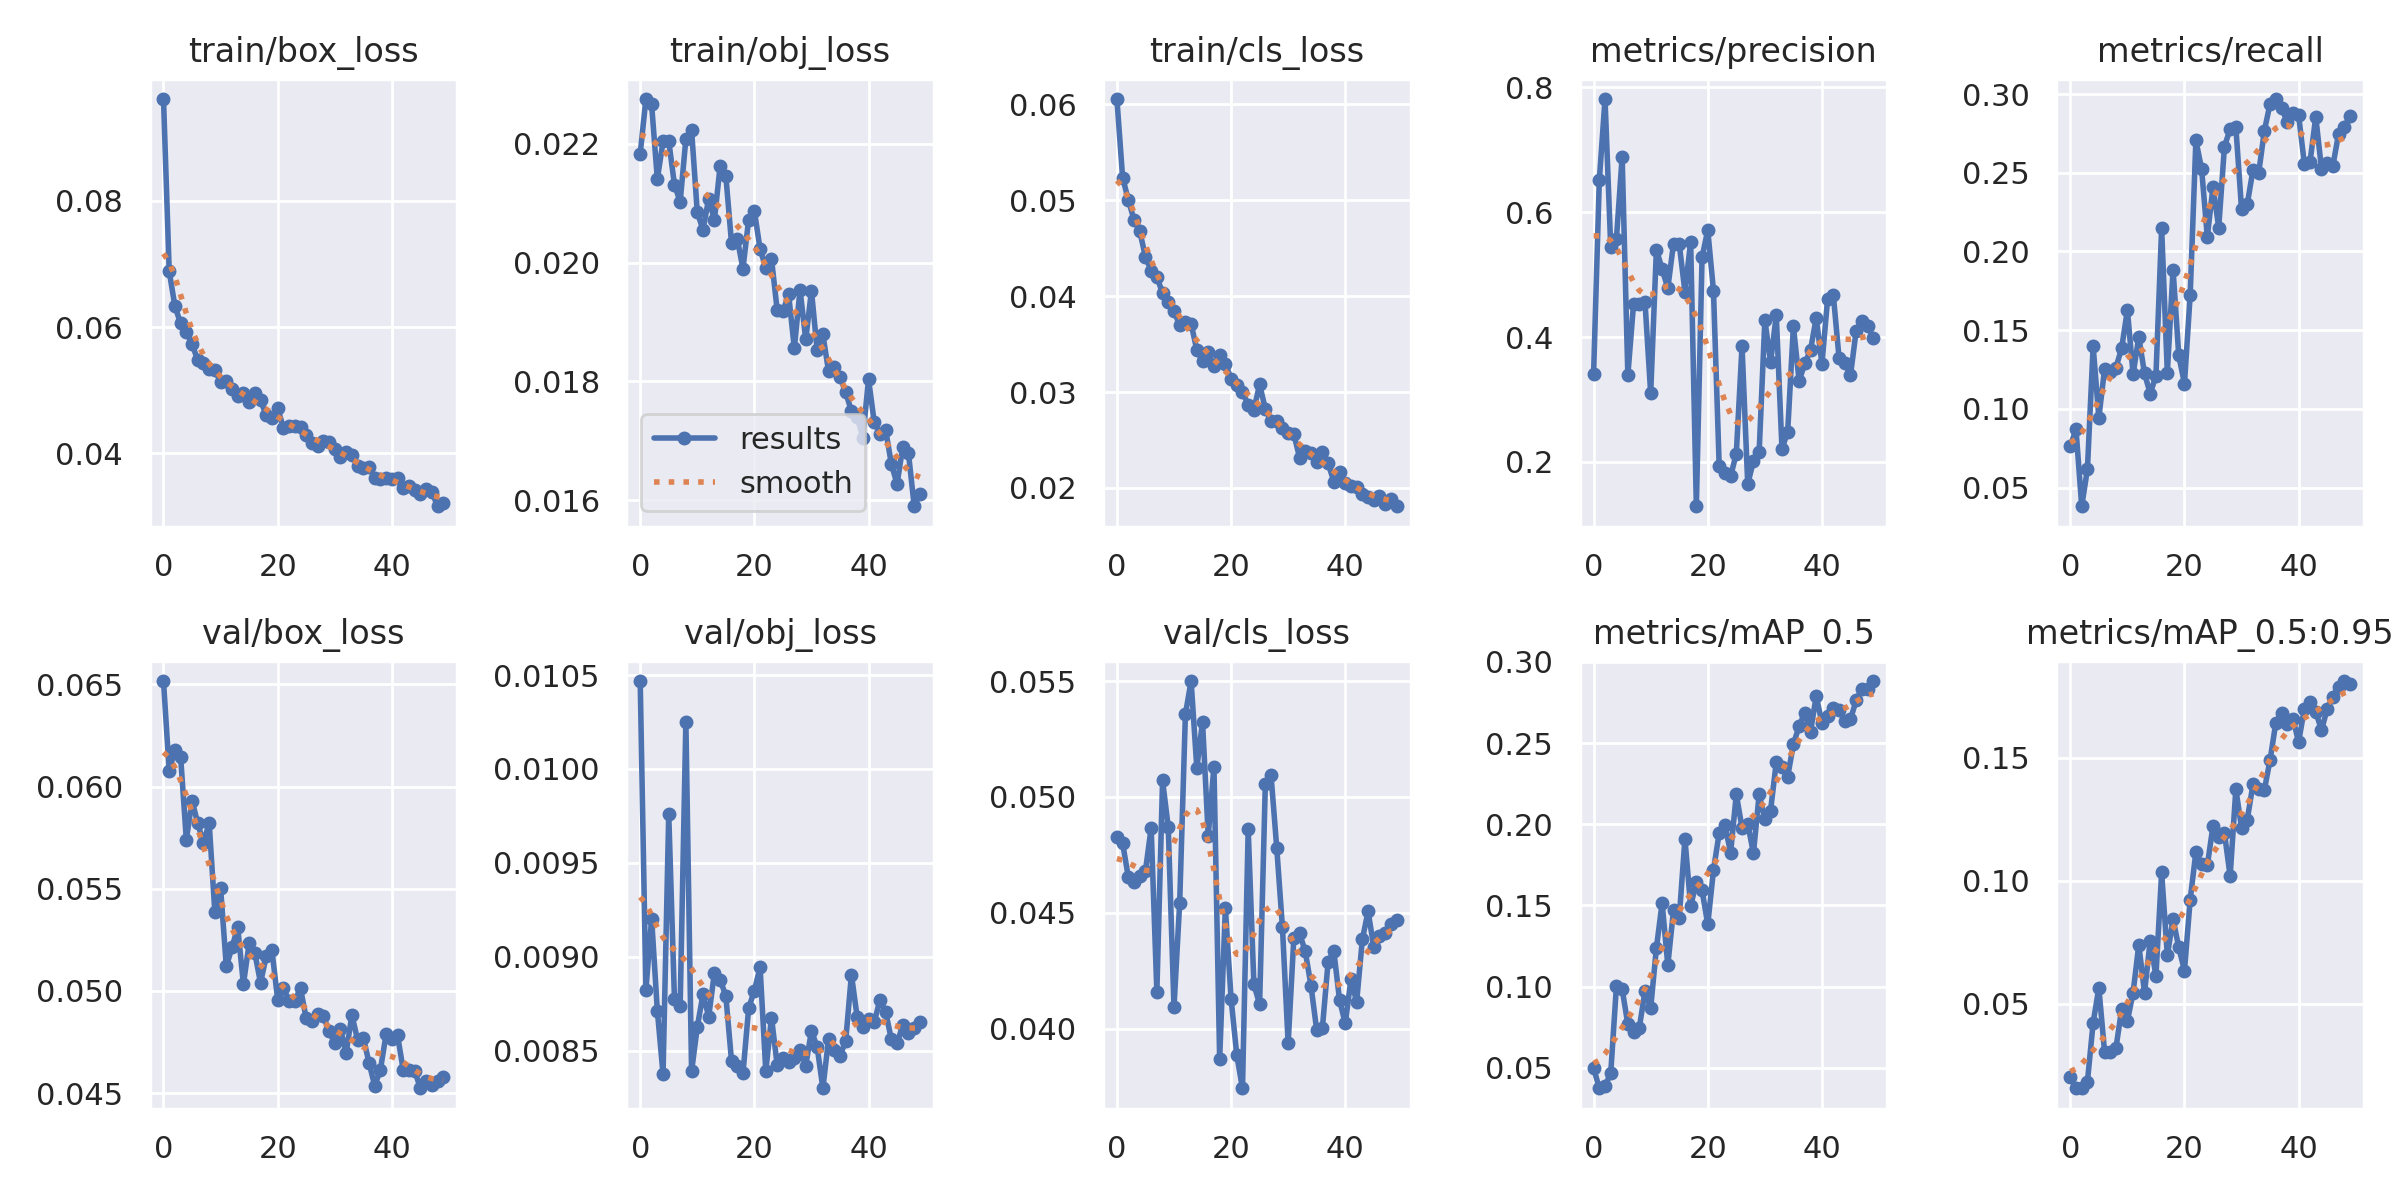

Found weight files: ['/content/yolov5/runs/train/exp/weights/best.pt', '/content/yolov5/runs/train/exp/weights/last.pt']
Found config files: ['/content/yolov5/runs/train/exp/opt.yaml', '/content/yolov5/runs/train/exp/hyp.yaml']
No detection images found. Check the path or run the detection.


In [26]:
# Step 1: Import necessary libraries
import glob
import matplotlib.pyplot as plt
from IPython.display import display
import PIL.Image
import os

# Step 2: Define utility functions

# Function to display multiple images in one figure
def display_images(images, cols=1, titles=None):
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1, n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int(n_images/cols) + 1, n + 1)
        if image.ndim == 2: plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

# Function to load an image
def load_image(path):
    return PIL.Image.open(path)

# Step 3: Load the training results (charts)

# Plot the training results chart
training_results_path = '/content/yolov5/runs/train/exp/results.png'  # Adjust this path if necessary
if os.path.exists(training_results_path):
    display(load_image(training_results_path))
else:
    print('Training results not found at', training_results_path)

# Step 4: Check the model's weights and config files

# Check the saved weights
weights_files = glob.glob('/content/yolov5/runs/train/exp/weights/*.pt')
if weights_files:
    print('Found weight files:', weights_files)
else:
    print('No weights files found.')

# Check the configuration file
config_files = glob.glob('/content/yolov5/runs/train/exp/*.yaml')
if config_files:
    print('Found config files:', config_files)
else:
    print('No config files found.')

# Step 5: Display a few prediction results on validation/test images

# Get a list of images in the detection result folder
result_images = glob.glob('/content/yolov5/runs/detect/exp*/crops/*/*.jpg')

# Check if the result_images list is not empty
if result_images:
    # Load images (up to a maximum number)
    max_images_to_display = 5
    images_to_display = [load_image(img) for img in result_images[:max_images_to_display]]
    # Display the images
    display_images(images_to_display, cols=3)
else:
    print("No detection images found. Check the path or run the detection.")


Training results found: /content/yolov5/runs/train/exp2/results.png


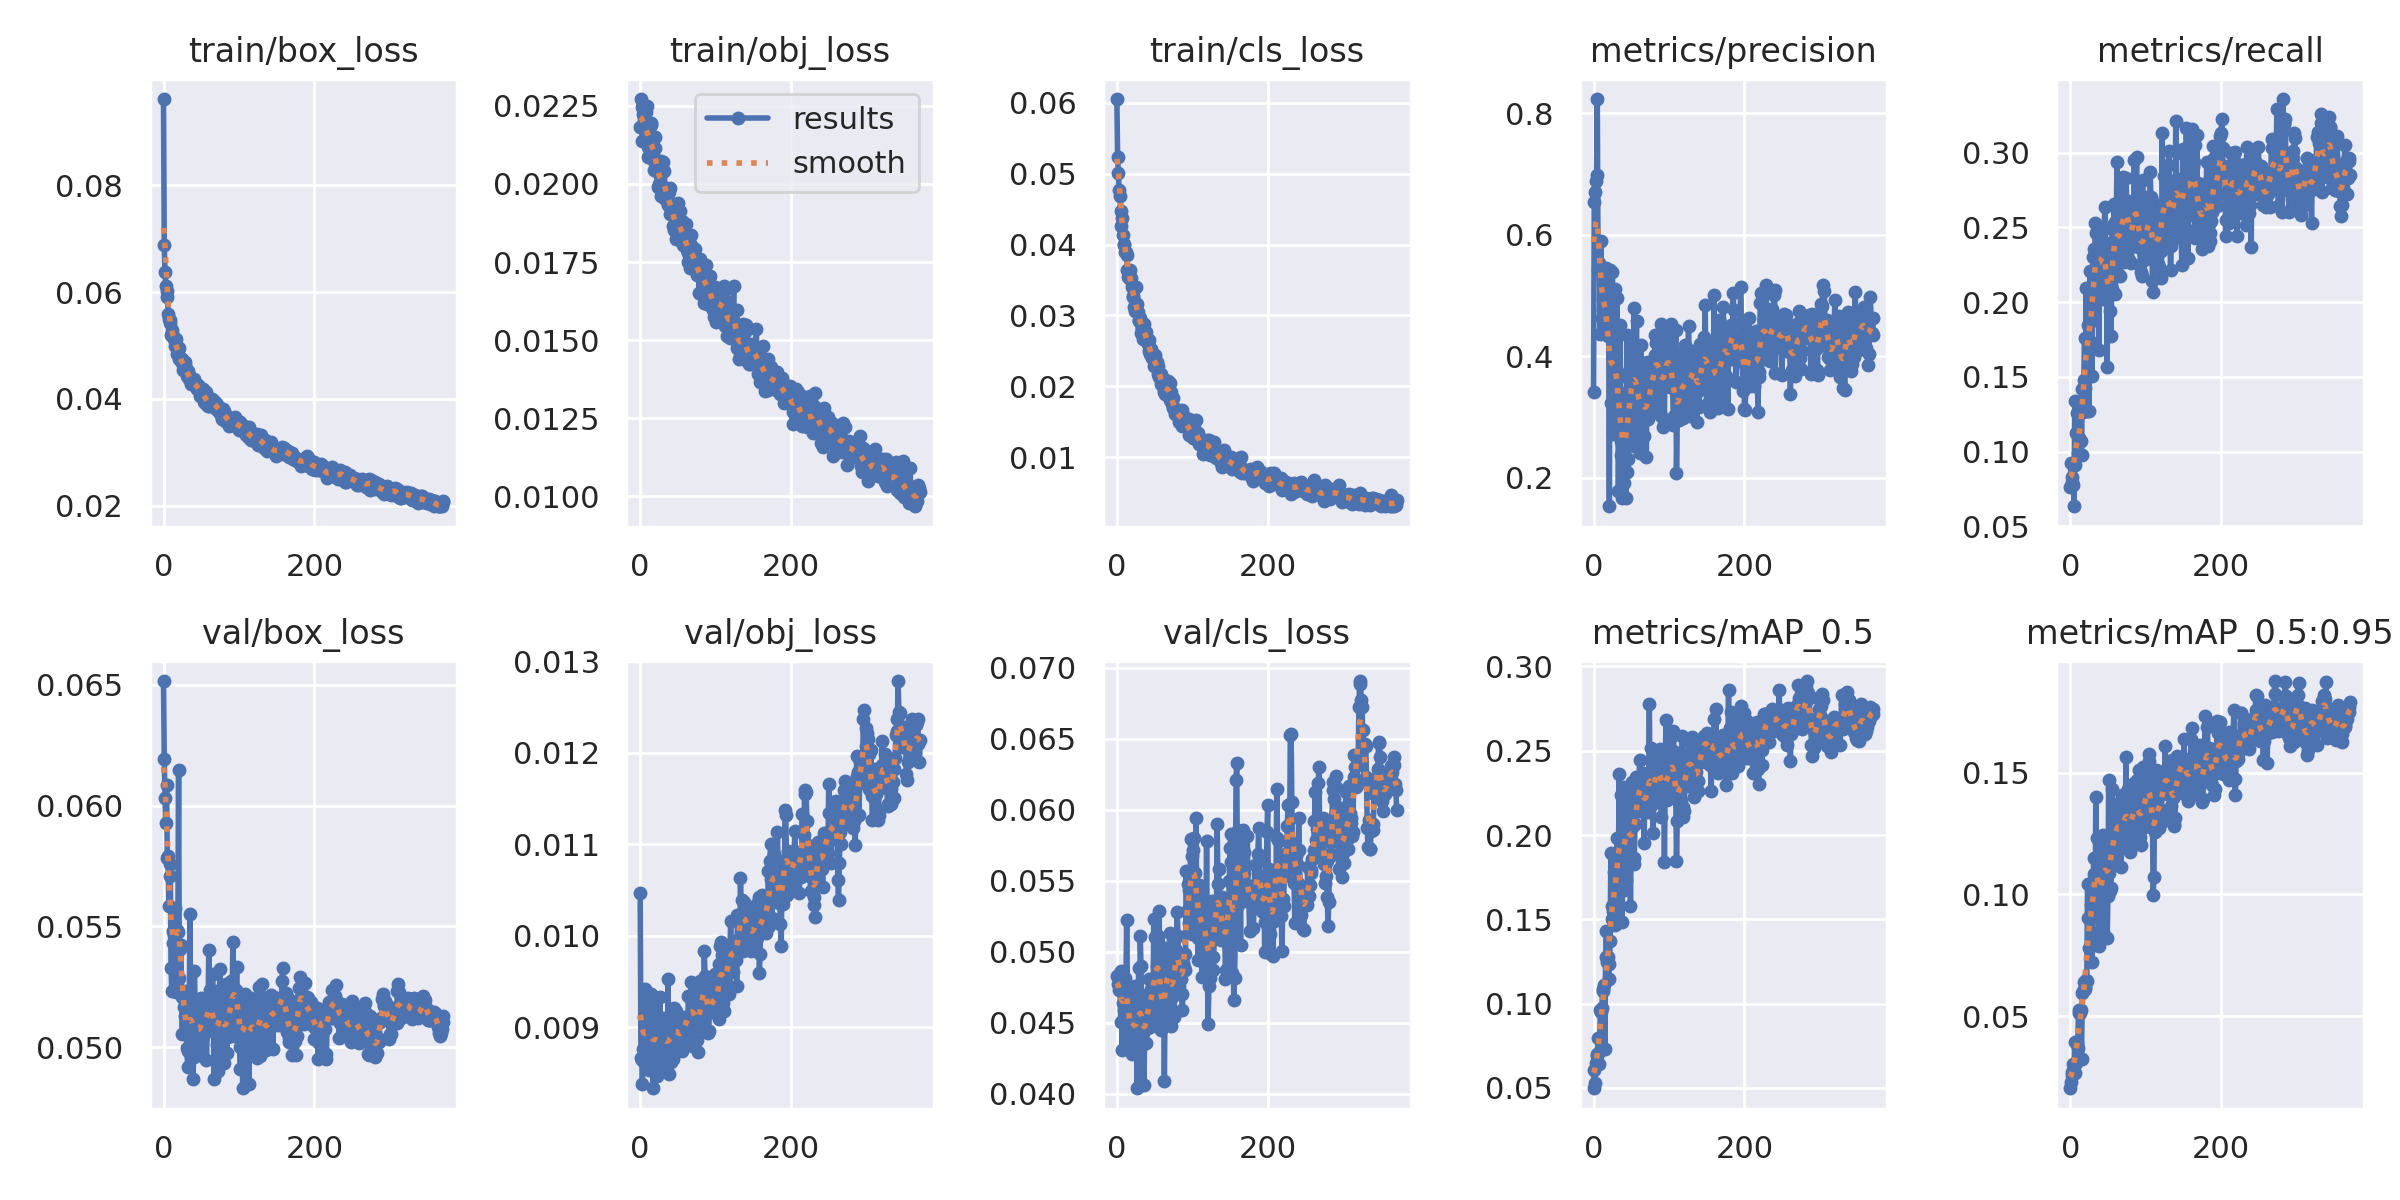

Found weight files: ['/content/yolov5/runs/train/exp2/weights/best.pt', '/content/yolov5/runs/train/exp2/weights/last.pt']
Found config files: ['/content/yolov5/runs/train/exp2/opt.yaml', '/content/yolov5/runs/train/exp2/hyp.yaml']
No detection images found in the latest detection directory.


In [27]:
import os
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Find the most recent training directory
train_dirs = glob.glob('/content/yolov5/runs/train/exp*')
latest_train_dir = max(train_dirs, key=os.path.getmtime) if train_dirs else None

# Check if the training directory exists
if latest_train_dir:
    # Look for the results.png file
    results_file = os.path.join(latest_train_dir, 'results.png')
    if os.path.exists(results_file):
        # Display training results
        print('Training results found:', results_file)
        display(Image(filename=results_file))
    else:
        print('Training results not found.')

    # Check for weight files
    weights_files = glob.glob(os.path.join(latest_train_dir, 'weights', '*.pt'))
    if weights_files:
        print('Found weight files:', weights_files)
    else:
        print('No weights files found.')

    # Check for config files
    config_files = glob.glob(os.path.join(latest_train_dir, '*.yaml'))
    if config_files:
        print('Found config files:', config_files)
    else:
        print('No config files found.')
else:
    print('No training directories found.')

# Look for detection results
detect_dirs = glob.glob('/content/yolov5/runs/detect/exp*')
latest_detect_dir = max(detect_dirs, key=os.path.getmtime) if detect_dirs else None

if latest_detect_dir:
    # Find images in the latest detection directory
    result_images = glob.glob(os.path.join(latest_detect_dir, 'labels', '*.jpg'))
    if result_images:
        # Display a few prediction results
        print(f'Displaying detection results from: {latest_detect_dir}')
        for img_path in result_images[:5]:  # Display first 5 results
            display(Image(filename=img_path))
    else:
        print('No detection images found in the latest detection directory.')
else:
    print('No detection directories found.')


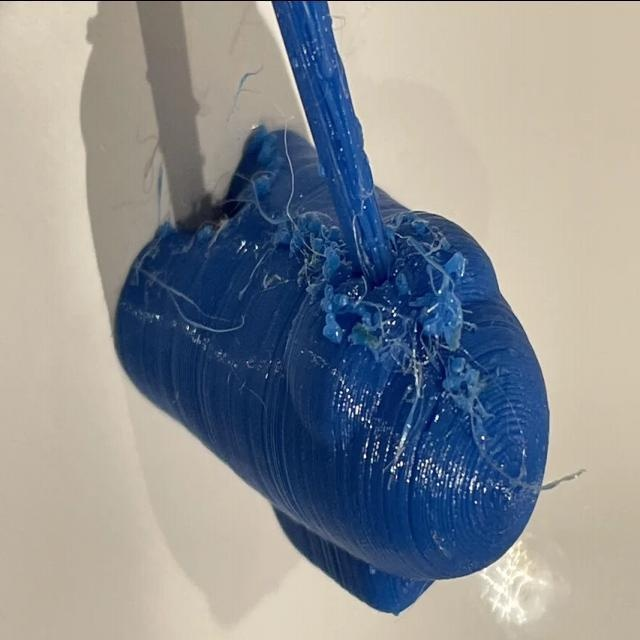

In [57]:
# Step 7: Display an inference result
from IPython.display import Image
import glob
import random

# Get a random image path from results
result_images = glob.glob('/content/yolov5/runs/detect/exp/*.jpg')
image_path = random.choice(result_images)

# Display the image
Image(filename=image_path)

In [58]:
import pandas as pd

# Path to the results.csv file
results_csv_path = '/content/yolov5/runs/train/exp2/results.csv'  # Adjust based on your experiment directory

# Load the CSV data into a DataFrame
df = pd.read_csv(results_csv_path)


In [59]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Objectness Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Validation Objectness Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss', linestyle='--')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting precision, recall, and mAP
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Metrics')
plt.legend()
plt.show()


KeyError: 'epoch'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Step 8: Mount Google Drive to save trained weights
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 9: Create a directory in Google Drive to store the weights
!mkdir -p "/content/drive/My Drive/YOLOv5_Weights"

In [ ]:
# Step 10: Copy the weights from the training output to Google Drive
!cp -r /content/yolov5/runs/train/exp/weights "/content/drive/My Drive/YOLOv5_Weights"

In [ ]:
# Step 11: Download the weights directly (Optional - if you want to download them to your local machine)
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

In [ ]:
# Step 12: If you want to download the full results (images, charts, etc.)
!zip -r results.zip /content/yolov5/runs/train/exp
files.download('results.zip')